In [1]:
import torch
import matplotlib.pyplot as plt
log = torch.load('../log.pt', weights_only=True)

In [2]:
def smoove(ax, y, smoothing_factor=50, color='C0', label=''):
    segments = y.unfold(0, size=smoothing_factor, step=1)
    mid = segments.mean(dim=-1)
    std = segments.std(dim=-1)

    x = torch.arange(y.size(0))[:-smoothing_factor+1]
    ax.plot(x, mid, color=color, label=label)
    ax.fill_between(x=x, y1=mid+std, y2=mid-std, color=color, alpha=0.2)

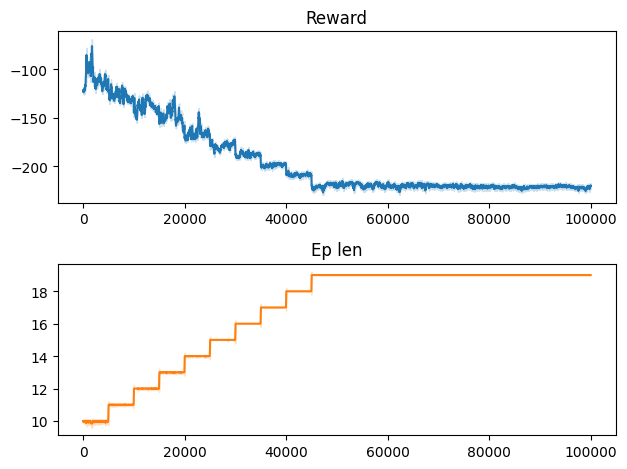

In [3]:
fig,(top,bottom) = plt.subplots(2,1)
smoove(top, torch.tensor(log['r']))
smoove(bottom, torch.tensor(log['lens']), color='C1')
top.set_title('Reward')
bottom.set_title('Ep len')

plt.tight_layout()
plt.show()